### This is the jupyter notebook for sentiment analysis of the tweets using the Twitter API
### FYP project
### Author: Muhammad Abu Bakar
### Author: Muhammad Faiz Hassan


In [217]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [218]:
# 2. Import keys.py
# use keys here 


auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)


In [219]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)



Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## We will use api as api.search inside this tweepy cursor.


In [220]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc




def get_tweets(Topic,Count):    
    i=0
    
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=1500, lang="en",tweet_mode='extended',result_type='recent').items():
        print(i, end='\r')
        date=tweet.created_at
        df.loc[i,"Date"] = date.strftime("%Y-%m-%d")
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.full_text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        
        
        
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

# send multiple topics in string format
Topic = "Abortion Law"
# Topic=["Donal Trump"]
get_tweets(Topic , Count=1500)

In [221]:
# Showing the data the Data
df.head(10)         

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-02-16,🐘 xenobriotic,False,"RT @AnnOlivarius: ""Proof of parenthood require...",0,3,"Seattle, WA"
1,2023-02-16,spinnity,False,RT @atima_omara: I’ve been busy w/ my own work...,0,10,Muwekma Ohlone lands
2,2023-02-16,Desiree,False,RT @sueonthetown: NEW: an exception under HIPA...,0,264,@desarrayed@mastodon.sdf.org
3,2023-02-16,🇺🇲 🇨🇦 🏳️‍🌈 🇦🇺 🇫🇷 🇮🇹 🇳🇿 🇬🇧✌️,False,RT @Laurie_Garrett: Running for Governor in #K...,0,17,"Milwaukee, WI"
4,2023-02-16,ginge 🐼,False,RT @atima_omara: I’ve been busy w/ my own work...,0,10,she/they - pan
5,2023-02-16,Serienya,False,RT @Laurie_Garrett: Running for Governor in #K...,0,17,East Coast
6,2023-02-16,M.M.M,False,"That they really need it, to see themselves fu...",0,0,
7,2023-02-16,Misty Day,False,"have an abortion, you have to leave the state—...",0,0,"Orange County, CA"
8,2023-02-16,diane raucher😷✡️🍩 🥀VOTE BLUE! NO Brogressives,False,RT @suzyinthesun_s: South Carolina Republicans...,0,63,"North Las Vegas, NV"
9,2023-02-16,jhgjhg,False,RT @VABVOX: My WaPo sub lets me share this gif...,0,192,


In [222]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()



def clean_tweet(tweet):
    # tokenization
    tweet = word_tokenize(tweet)
    # lower case
    tweet = [word.lower() for word in tweet]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = " ".join(tweet)
    tweet = tweet.strip()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # remove http links
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    # remove https and username and special characters
    tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    tweet = PorterStemmer().stem(tweet)
    tweet = tweet.strip('https')
    tweet =tweet.split()
    tweet = [t for t in tweet if len(t) > 2]
    tweet = " ".join(tweet)
    
    
    return tweet



[nltk_data] Downloading package omw-1.4 to /home/bakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [223]:


from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # print analysis values
    if analysis.sentiment.polarity >=0 and analysis.sentiment.polarity <=0.3:
        some_positive = "some positive"
        return some_positive
    elif analysis.sentiment.polarity >=0.3 and analysis.sentiment.polarity <=0.6:
        positive = "positive"
        return positive
    elif analysis.sentiment.polarity >=0.6 and analysis.sentiment.polarity <=1:
        very_positive = "very positive"
        return very_positive
    elif analysis.sentiment.polarity >=-0.3 and analysis.sentiment.polarity <=0:
        some_negative = "some negative"
        return some_negative    
    elif analysis.sentiment.polarity >=-0.6 and analysis.sentiment.polarity <=-0.3:
        negative = "negative"
        return negative
    elif analysis.sentiment.polarity >=-1 and analysis.sentiment.polarity <=-0.6:
        very_negative = "very negative"
        return very_negative
    else:
        neutral = "neutral"
        return neutral


In [224]:

from wordcloud import WordCloud, STOPWORDS


def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    # don't want to prnt these words in WordCloud
    return text_new


prepCloud("Abortion Law",Topic)



'Abortion Law'

In [225]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))

df.head(5)


,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2023-02-16,🐘 xenobriotic,False,"RT @AnnOlivarius: ""Proof of parenthood require...",0,3,"Seattle, WA",annolivarius proof parenthood requires petitio...
1,2023-02-16,spinnity,False,RT @atima_omara: I’ve been busy w/ my own work...,0,10,Muwekma Ohlone lands,busy work lately icymi gov youngkin block bill...
2,2023-02-16,Desiree,False,RT @sueonthetown: NEW: an exception under HIPA...,0,264,@desarrayed@mastodon.sdf.org,sueonthetown new exception hipaa allows health...
3,2023-02-16,🇺🇲 🇨🇦 🏳️‍🌈 🇦🇺 🇫🇷 🇮🇹 🇳🇿 🇬🇧✌️,False,RT @Laurie_Garrett: Running for Governor in #K...,0,17,"Milwaukee, WI",running governor kentucky mean current law som...
4,2023-02-16,ginge 🐼,False,RT @atima_omara: I’ve been busy w/ my own work...,0,10,she/they - pan,busy work lately icymi gov youngkin block bill...


In [226]:


df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)
# save df['sentiment'] to csv
df.to_excel('{}.xlsx'.format("Sentiment"),index=False)   ## Save as Excel



In [227]:
# use naive bayes classifier for sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

# 
# Split into training and testing data
# load data from sentiment.xlsx
x = df['clean_tweet']
y = df['Sentiment']
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [228]:
# Vectorize text reviews to numbers
vec = CountVectorizer()
x = vec.fit_transform(x)
x_test = vec.transform(x_test)


In [229]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [230]:
model.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ",model.score(x_test, y_test)*100,"%")


Accuracy of Naive Bayes Classifier is :  91.36212624584718 %


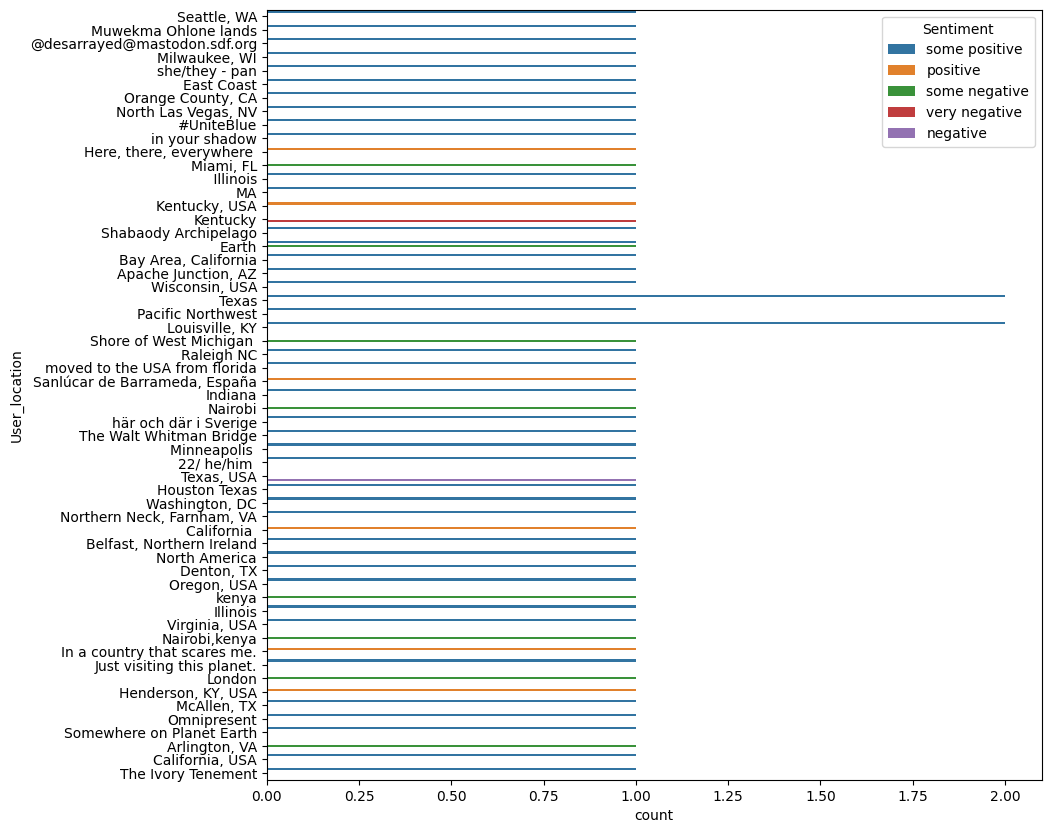

In [231]:
# plot user_location graph using seaborn on behalf of 100 tweets 
plt.figure(figsize=(10,10))
# print user location graph for first 100 tweets
data = pd.read_excel('Sentiment.xlsx')
data = data.head(100)
# User location with sentiment
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


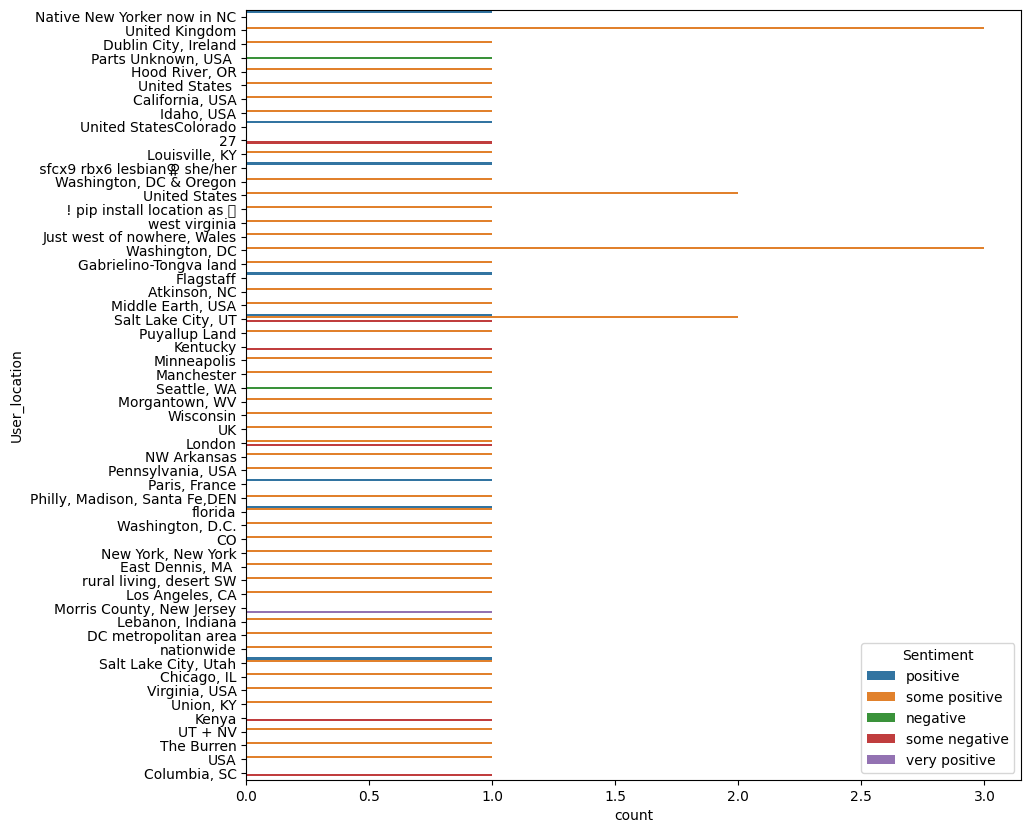

In [232]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[100:200]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127797 (\N{CACTUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127987 (\N{WAVING WHITE FLAG}) missing from current font.
  fig.canvas.print_figure(by

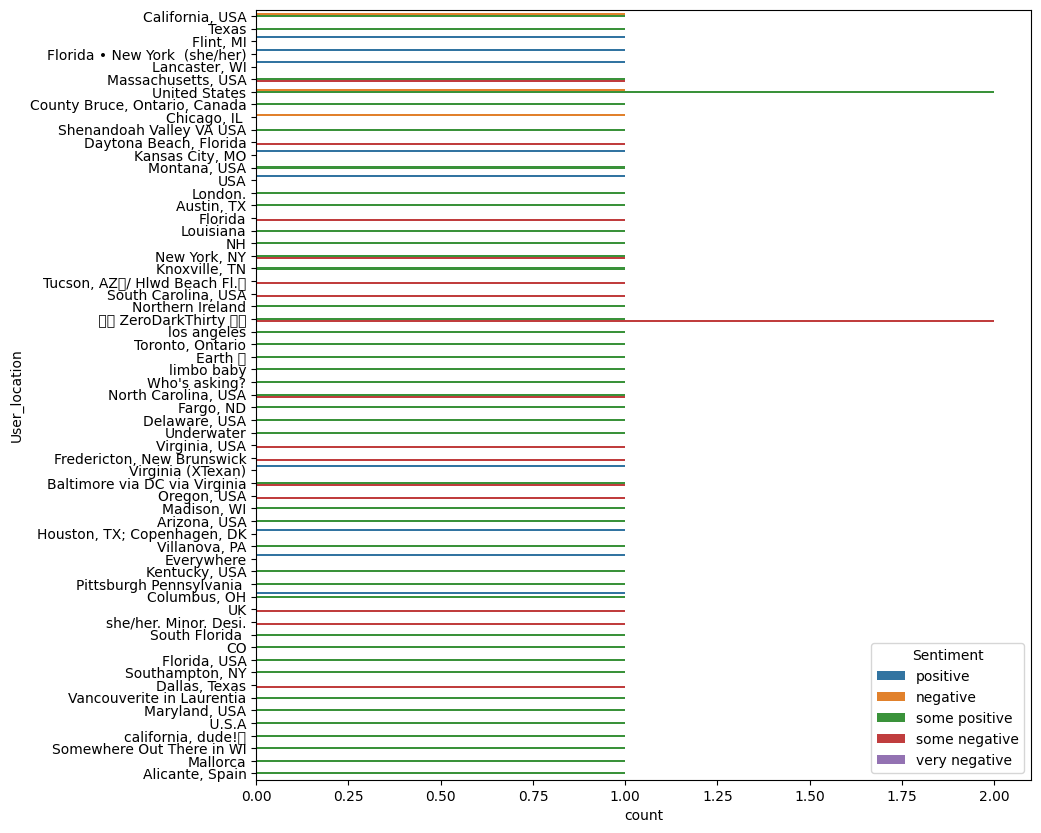

In [233]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[200:300]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127797 (\N{CACTUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io,

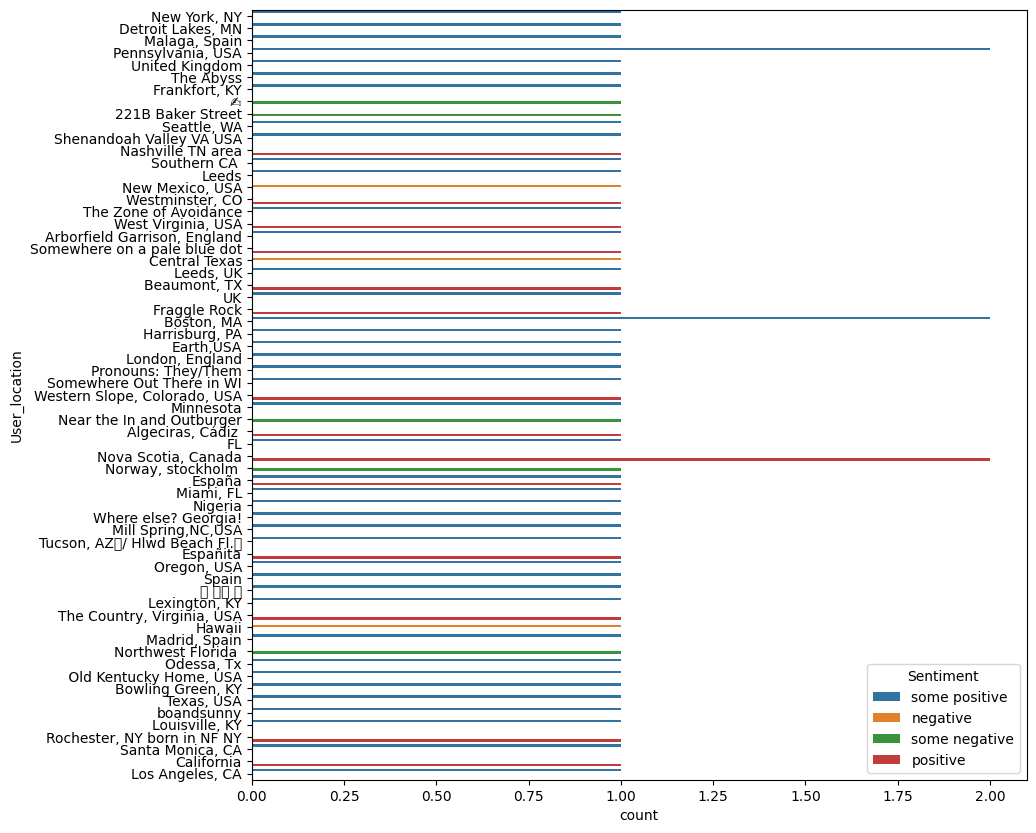

In [234]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[300:400]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


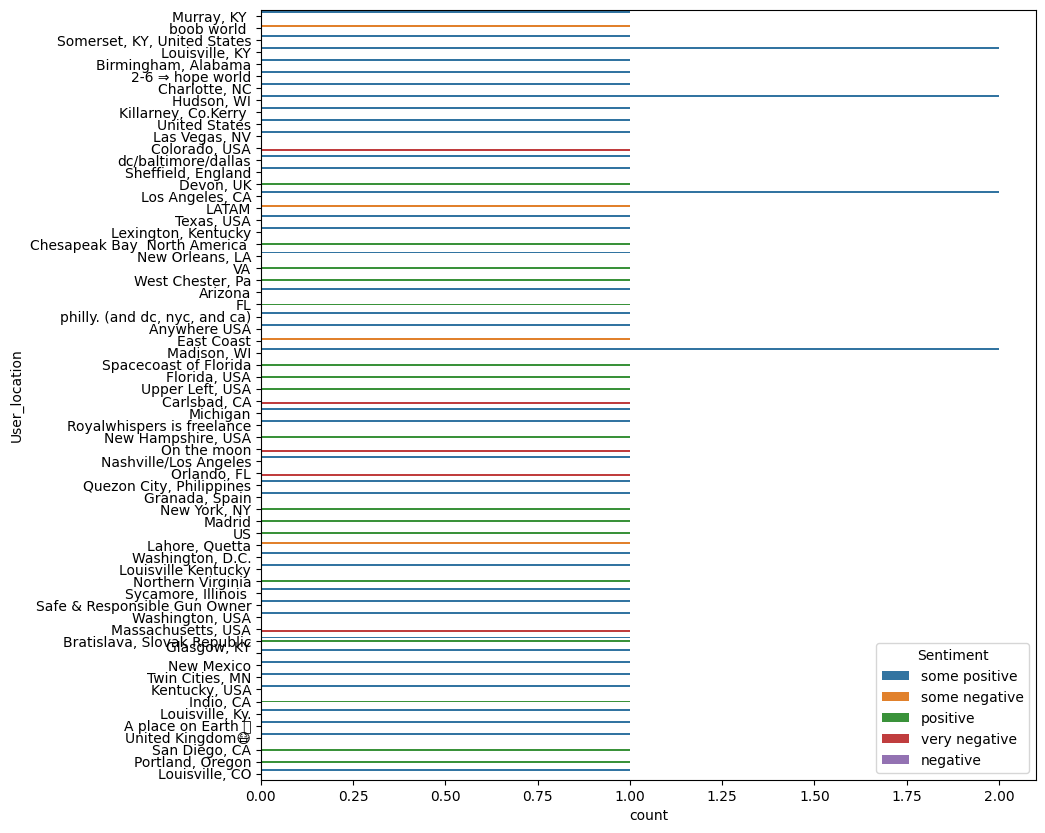

In [235]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[400:500]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

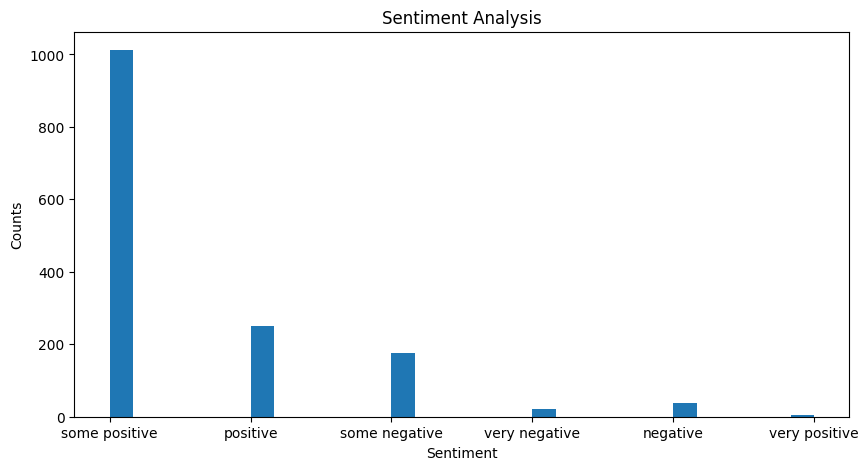

([<matplotlib.patches.Wedge at 0x7efe7722ad40>,
 [Text(-0.5724400505200575, 0.9393148506015404, 'some positive'),
  Text(0.05408209011845729, -1.0986697081145085, 'positive'),
  Text(0.890189204262656, -0.6461912879436084, 'some negative'),
  Text(1.082228442813878, -0.19693043839043517, 'negative'),
  Text(1.0981115997505535, -0.06442759108705196, 'very negative'),
  Text(1.099961449766082, -0.009209181749718296, 'very positive')],
 [Text(-0.312240027556395, 0.5123535548735674, '67.4%'),
  Text(0.029499321882794884, -0.5992743862442773, '16.7%'),
  Text(0.4855577477796305, -0.35246797524196816, '11.7%'),
  Text(0.5903064233530243, -0.10741660275841917, '2.5%'),
  Text(0.5989699635003018, -0.03514232241111924, '1.3%'),
  Text(0.599978972599681, -0.005023190045300888, '0.3%')])

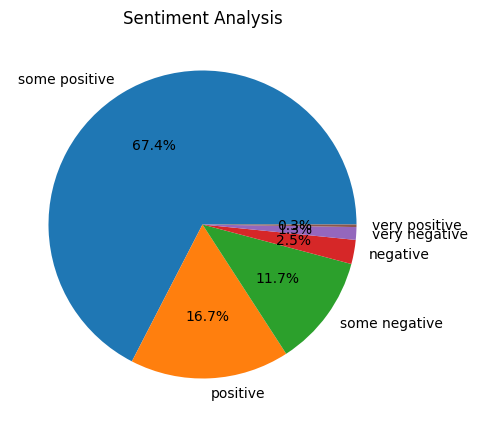

In [236]:
# print report of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# plot graph of sentiment analysis with matplotlib
plt.hist(df['Sentiment'], bins=30)
plt.show()
# print pie chart of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')

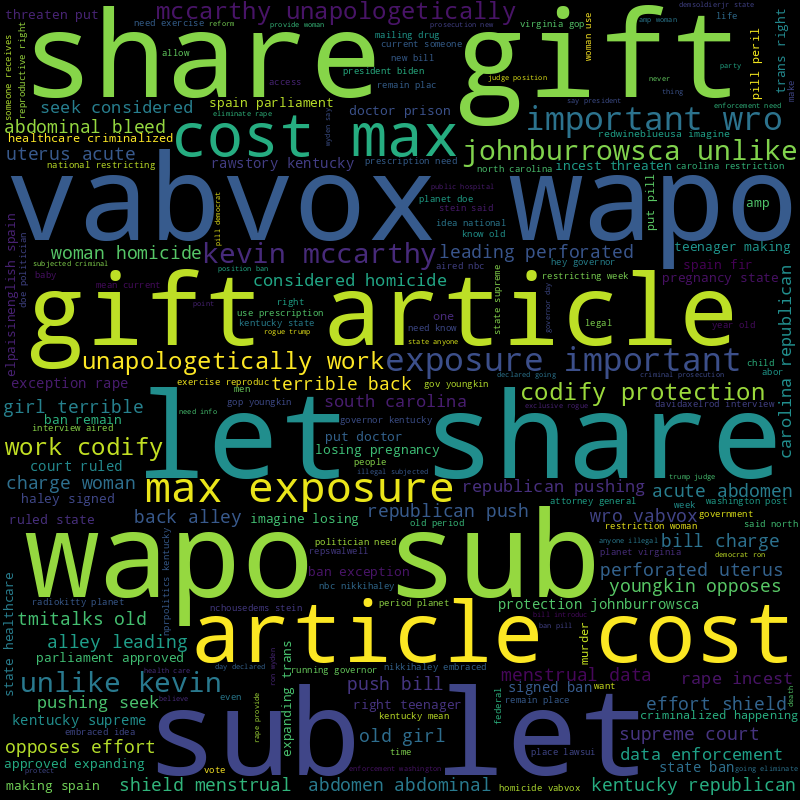

In [237]:
# plot word cloud for maximum occuring words
wordcloud = WordCloud(width = 800, height = 800)
wordcloud.generate(prepCloud(df['clean_tweet'].str.cat(sep=' '),Topic))
wordcloud.to_image()